# Multilayer Nueral Network for MNIST.

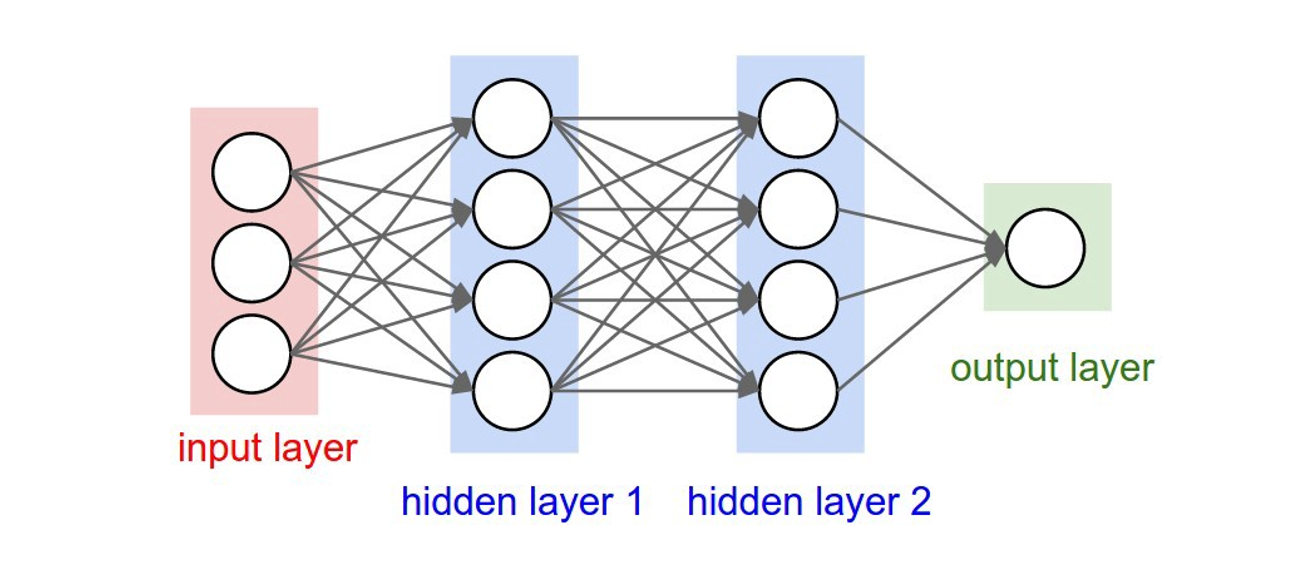

A widely used dataset in the field of Deep Learning is the MNIST dataset.
This dataset contains 20,000 image samples of 28x28 pixels (784 pixels), showing handwritten digits, which we will try to classify from 0-9. That is, we will work with a dataset of dimensions 20,000x784. Each of the input variables contains an integer value ranging from 0 to 255, indicating the grayscale intensity of the corresponding pixel.

Can we manage to train a Multilayer Neural Network to classify this data?

---

**Task:** Use Keras functionalities to create and train a classifier.

1. Load the data and preprocess it in the appropriate way. Scale the input variables, convert the labels to **one-hot label**, etc....
 
2. Once your data is loaded, generate the training and validation data. Also visualize some of the images in your dataset to understand what kind of images we are operating with.

3. Build the model with Keras. Choose how many layers to use, how many neurons, what kind of activation function, etc. Every decision made in the architecture must be justified.

4. Train the model with Keras. Choose which optimizer to use, which learning-rate, which batch_size, epochs, etc. Every decision made in the architecture must be justified. Use 

5. When training the model, for each *epoch* show metrics of the *cost function* and the *Accuracy* for the *train* and *validation* set. Display on a graph the evolution of both metrics as a function of the number of epochs.

6. Once the model is trained, what accuracy have you obtained? Select some examples that have **NOT** been correctly classified by your classifier and display them. Also show in the title of each graph the prediction generated by your model. Are these errors reasonable?

In [1]:
import numpy as np

# Load the MNIST dataset.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = mnist[:, 1: ]
Y = OneHotEncoder().fit_transform(mnist[:, 0:1]).toarray()

# Scale the value of X
X = X / 255.

print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape, Y_train.shape)

(20000, 784) (20000, 10)
(15000, 784) (15000, 10)


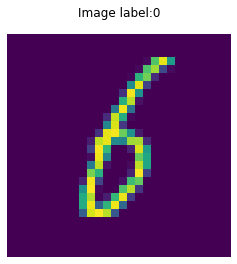

In [3]:
# Example of an image of MNIST

import matplotlib.pyplot as plt

im = 127

plt.matshow(X[im, :].reshape((28,28)))
plt.title('Image label:' + str(int(Y[im, 0])))
plt.axis('off')
plt.show()

In [4]:
import tensorflow as tf

from tensorflow.keras.layers       import Dense, Flatten, Conv2D
from tensorflow.keras              import Model, Sequential
from tensorflow.keras.optimizers   import SGD

# Building the model
model = Sequential()

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(10,  activation='softmax'))

model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics='acc')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [5]:
# Training of the model

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5531 - acc: 0.8236 - val_loss: 0.3013 - val_acc: 0.9058
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2191 - acc: 0.9339 - val_loss: 0.2026 - val_acc: 0.9378
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1479 - acc: 0.9549 - val_loss: 0.1602 - val_acc: 0.9530
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1089 - acc: 0.9660 - val_loss: 0.1706 - val_acc: 0.9516
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0821 - acc: 0.9745 - val_loss: 0.1532 - val_acc: 0.9546
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0656 - acc: 0.9801 - val_loss: 0.1406 - val_acc: 0.9602
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0475 - acc: 0.9853 - val_loss: 0.1500 - val_acc: 0.9614
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [6]:
model.evaluate(X_test, Y_test)
model.save_weights('./model1')

157/157 [==============================] - 0s 2ms/step - loss: 0.1756 - acc: 0.9604


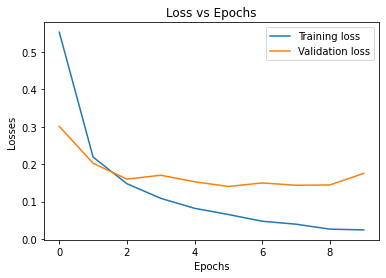

In [7]:
# Visualize the evolution of the error during the training
plt.plot(hist.history['loss'],     label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

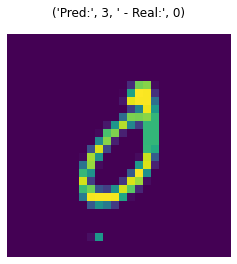

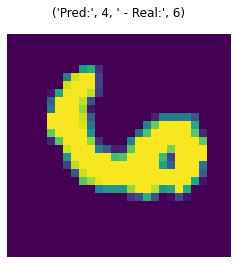

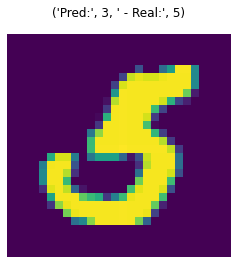

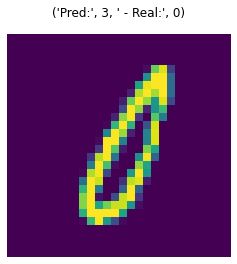

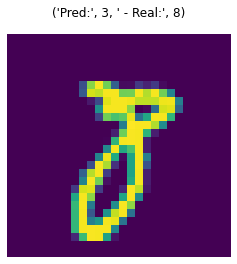

In [8]:
# Visualize some the the wrong predictions
Yp = model.predict(X_test)

pred_errors = np.argmax(Yp, axis=1) != np.argmax(Y_test, axis=1)

X_errors = X_test[pred_errors]
Yp_errors = np.argmax(Yp[pred_errors], axis=1)
Yr_errors = np.argmax(Y_test[pred_errors], axis=1)

for im in np.random.choice(range(len(X_errors)), 5):
  plt.matshow(X_errors[im, :].reshape((28, 28)))
  plt.axis('off')
  plt.title(('Pred:', Yp_errors[im], ' - Real:', Yr_errors[im]))

In [9]:
# Performance of the trained model
print(model.evaluate(X_test, Y_test))
# Saving the model
model.save("./model_1")

model = None # We delete the model by mistake :(

model = tf.keras.models.load_model("./model_1")
# We check that the saved model is already trained
print(model.evaluate(X_test, Y_test))

157/157 [==============================] - 0s 2ms/step - loss: 0.1756 - acc: 0.9604
[0.17557233572006226, 0.9603999853134155]
INFO:tensorflow:Assets written to: ./model_1/assets
157/157 [==============================] - 0s 2ms/step - loss: 0.1756 - acc: 0.9604
[0.17557233572006226, 0.9603999853134155]


# Data Augmentation.


 **How robust is the model?**


We have found that by using a simple Multilayer Neural Network we can obtain a very good hit rate (approx. 96%) in the prediction of MNIST numbers. But... How robust is the model? Or in other words, how are the model predictions affected when variations in the input data occur?

The images we pass to the model could be generated from taking a picture of a handwritten digit. It is also likely that some of the photos we want to predict are not centered (e.g. a) or not correctly aligned (e.g. b) or suffer from poor quality (e.g. c). ***Do you think this may affect the performance of the model?**


<br>

<centered> ![texto alternativo](https://i.imgur.com/qs86wF1.jpg) </centered>

---

**Task:** 

1. Use the ***test_set*** to generate three new different test sets including the different perturbations mentioned above (translations, rotations, and noise 25% and noise 50%). For this, make use of the ***ImageDataGenerator()*** methods with which you can define different types of preprocessing. For the perturbation with noise, implement your own method to add noise and apply it through the ***preprocessing_function*** attribute of the generator.

> **In translation, move a maximum of 50% of the image pixels per axis. In rotation, do not rotate the image more than 90º. In noise, add a maximum amount of noise of +-0.25 and +-0.5 (25% Noise and 50% Noise)**.

> 📣 **Important** : To apply the transformations on the images you will have to change their shape to two-dimensional. Remember to recover their one-dimensional vector shape again before training to neural network. 

2. Check the performance of the generators by extracting one image from each of these and visualizing them all in the same subplot.

3. Evaluate the behavior of the model in the face of disturbed data. How do you expect this behavior to be? Will it be **robust** in the face of these distortions? Evaluate your model with each of the generator data for the ***test set*** and compare the results obtained. Can you think of any way to avoid this?

In [10]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

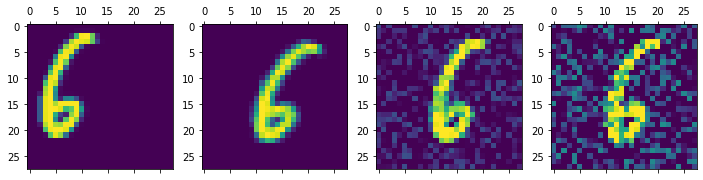

In [11]:
import tensorflow as tf

from tensorflow.keras.layers              import Dense, Flatten, Conv2D
from tensorflow.keras                     import Model, Sequential
from tensorflow.keras.optimizers          import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Change the shape to bidimensional image 28x28
# in order to be able to perform the transformations
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)

# Create the functions of preprocessing which add a factor of noise

def add_noise(img, f):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * f
    img = np.clip(img + noise, 0., 1.)
    return img

# Generator of images with 25% of noise
n25_datagen = ImageDataGenerator(preprocessing_function=lambda x: add_noise(x, 0.25))
# Generator of images with 50% of noise
n50_datagen = ImageDataGenerator(preprocessing_function=lambda x: add_noise(x, 0.50))
# Generator of rotated images
rot_datagen = ImageDataGenerator(rotation_range=90)
# Generator of translated images
pos_datagen = ImageDataGenerator(width_shift_range  = 0.5, 
                                 height_shift_range = 0.5)

# We add all of them in one list
preproc = [pos_datagen, rot_datagen, n25_datagen, n50_datagen]

fig, axs = plt.subplots(1, 4, figsize=(12,12))

# Visualizing the effects of the preprocessing
for i in range(4):
  axs[i].matshow(next(preproc[i].flow(X_train[0:1,...]))[0,:,:,0])
plt.show()

In [12]:
print('Position perturbationn:', model.evaluate(pos_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('Rotation perturbation:', model.evaluate(rot_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('25% noise perturbation:', model.evaluate(n25_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('50% noise perturbation:', model.evaluate(n50_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))

157/157 [==============================] - 2s 11ms/step - loss: 6.8530 - acc: 0.1348
Position perturbationn: [6.853043079376221, 0.1348000019788742]
157/157 [==============================] - 2s 10ms/step - loss: 4.3726 - acc: 0.4860
Rotation perturbation: [4.372631549835205, 0.4860000014305115]
157/157 [==============================] - 1s 6ms/step - loss: 0.2280 - acc: 0.9430
25% noise perturbation: [0.22795051336288452, 0.9430000185966492]
157/157 [==============================] - 1s 6ms/step - loss: 0.5654 - acc: 0.8388
50% noise perturbation: [0.5654033422470093, 0.8388000130653381]


In [13]:
# Function to create MNN models

def create_model():
  model = Sequential()

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64,  activation='relu'))
  model.add(Dense(32,  activation='relu'))
  model.add(Dense(16,  activation='relu'))
  model.add(Dense(10,  activation='softmax'))

  return model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


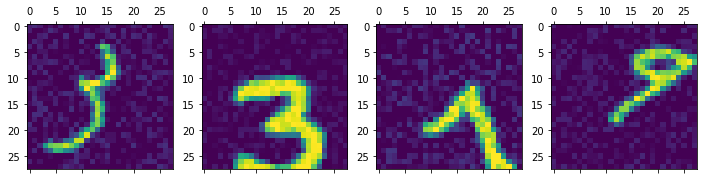

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


469/469 [==============================] - 10s 21ms/step - loss: 2.0535 - acc: 0.2529 - val_loss: 1.7009 - val_acc: 0.3880
Epoch 2/100
469/469 [==============================] - 10s 21ms/step - loss: 1.5222 - acc: 0.4681 - val_loss: 1.2447 - val_acc: 0.5896
Epoch 3/100
469/469 [==============================] - 12s 26ms/step - loss: 1.2199 - acc: 0.5916 - val_loss: 1.1487 - val_acc: 0.6154
Epoch 4/100
469/469 [==============================] - 10s 21ms/step - loss: 1.0293 - acc: 0.6631 - val_loss: 0.9216 - val_acc: 0.6920
Epoch 5/100
469/469 [==============================] - 10s 21ms/step - loss: 0.9172 - acc: 0.7010 - val_loss: 0.8295 - val_acc: 0.7416
Epoch 6/100
469/469 [==============================] - 9s 19ms/step - loss: 0.8336 - acc: 0.7295 - val_loss: 0.8678 - val_acc: 0.7150
Epoch 7/100
469/469 [==============================] - 9s 19ms/step - loss: 0.7958 - acc: 0.7448 - val_loss: 0.7043 - val_acc: 0.7762
Epoch 8/100
469/469 [==============================] - 9s 19ms/step -

In [14]:
# Create a new model
model = create_model()
model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics='acc')

def add_noise(img, f):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * np.random.rand() * f 
    img = np.clip(img + noise, 0., 1.)
    return img

pert_datagen = ImageDataGenerator(width_shift_range  = 0.2, 
                                  height_shift_range = 0.2,
                                  rotation_range=45,
                                  preprocessing_function=lambda img: add_noise(img, 0.25))

fig, axs = plt.subplots(1, 4, figsize=(12,12))
for i in range(4):
  axs[i].matshow(next(pert_datagen.flow(X_train))[0,:,:,0])
plt.show()

model.fit_generator(pert_datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train), 
                    validation_data=(pert_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)), 
                    epochs=100)

print('Position perturbation:', model.evaluate(pos_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('Rotation perturbation:', model.evaluate(rot_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('25% noise perturbation:', model.evaluate(n25_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('50% noise perturbation:', model.evaluate(n50_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))

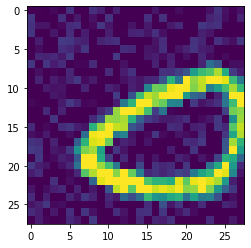

In [15]:
plt.imshow(next(pert_datagen.flow(X_train))[0,:,:,0])